# Caption Generator Project

This project demonstrates how to fine-tune a model using the Google Generative AI API to generate creative captions based on specific inputs. The captions are tailored for various domains such as fitness, travel, food, and more. Below is a detailed guide to help you understand and replicate the process.

---

## **Features**
- Fine-tunes a base model to generate captions specific to your needs.
- Supports domain-specific inputs like GYM training, Travel, Cake Company, etc.
- Outputs captions with hashtags for effective engagement on social platforms.
- Visualizes the training progress with loss metrics.
- Allows testing of generated captions after tuning.
- Deletes tuned models when no longer needed.

---

## **Setup and Requirements**

### **Prerequisites**
- **Python**: Ensure Python 3.8+ is installed.
- **Google Colab**: Recommended environment for running this code.
- **Google Generative AI API**: Requires access and API key.

### **Install Required Libraries**
```bash
pip install -q google-generativeai
pip install seaborn pandas
```

---

## **How to Run the Project**

### **1. Configure the API Key**
Replace the placeholder in the code with your **Google API key**:
```python
from google.colab import userdata
genai.configure(api_key=userdata.get('GOOGLE_API_KEY'))
```

### **2. Define and Prepare the Model**
- Import the required libraries.
- Select the base model that supports fine-tuning.
- Create a unique ID for the tuned model:
```python
name = f'Caption Generator-{random.randint(0,10000)}'
tuned_model_id = re.sub(r'[^a-z0-9-]', '-', name.lower()).strip('-')
```

### **3. Provide Training Data**
Training data consists of input-output pairs. For example:
```python
{
  'text_input': 'GYM Training',
  'output': 'No pain, no gain. 💪 #FitnessGoals #Workout #Motivation #Strength #Health',
}
```
A variety of inputs and outputs are included for different domains like Travel, Yoga, Books, Ice Cream, and more.

### **4. Train the Model**
- Use the `genai.create_tuned_model` function to fine-tune the base model:
```python
operation = genai.create_tuned_model(
    source_model=base_model.name,
    training_data=[...],
    id=tuned_model_id,
    epoch_count=4,
    batch_size=4,
    learning_rate=0.001,
)
```

- Monitor the training process using:
```python
for status in operation.wait_bar():
  time.sleep(30)
```

### **5. Visualize Training Progress**
- Visualize loss metrics for each epoch using Pandas and Seaborn:
```python
snapshots = pd.DataFrame(model.tuning_task.snapshots)
sns.lineplot(data=snapshots, x='epoch', y='mean_loss')
```

### **6. Generate Captions**
Test the fine-tuned model by generating captions for various inputs:
```python
result = model.generate_content('Sports')  
print(result.text)
```

### **7. Clean Up Resources**
After testing, delete the tuned model if it's no longer needed:
```python
genai.delete_tuned_model(f'tunedModels/{tuned_model_id}')
```
Verify the deletion:
```python
try:
  m = genai.get_tuned_model(f'tunedModels/{tuned_model_id}')
  print(m)
except Exception as e:
  print(f"{type(e)}: {e}")
```

---

## **Training Data**
The training data includes various inputs with corresponding outputs, for example:

| **Input**              | **Output**                                                                 |
|-------------------------|---------------------------------------------------------------------------|
| GYM Training           | No pain, no gain. 💪 #FitnessGoals #Workout #Motivation #Strength #Health |
| Cake company           | Sweet moments. 🧁 #CakeLove #SweetTreats #Desserts #Baking #Celebration  |
| Travel agency          | Adventure awaits. 🌍 #TravelGoals #Wanderlust #Explore #Adventure #Vacation |
| Yoga studio            | Find your balance. 🧘‍♀️ #YogaLife #Mindfulness #Wellness #Balance #Peace |

---

## **Visualization Example**
![Training Loss](training_loss_graph_placeholder.png)

---

## **Key Functions Used**
- `genai.list_models()`: Lists available models.
- `genai.create_tuned_model()`: Creates a fine-tuned model.
- `genai.get_tuned_model()`: Retrieves the tuned model.
- `genai.delete_tuned_model()`: Deletes the tuned model.

---



In [1]:
!pip install -q google-generativeai

In [2]:
import google.generativeai as genai

In [3]:
from google.colab import userdata
genai.configure(api_key=userdata.get('GOOGLE_API_KEY'))

In [4]:
for i, m in zip(range(5), genai.list_tuned_models()):
  print(m.name)

tunedModels/generate-num-373
tunedModels/generate-num-5941
tunedModels/generate-num-240
tunedModels/generate-num-3212
tunedModels/caption-generator-2162


In [6]:
base_model = [
    m for m in genai.list_models()
    if "createTunedModel" in m.supported_generation_methods and
    "flash" in m.name][0]

In [7]:
import random
import re

name = f'Caption Generator-{random.randint(0,10000)}'
# Modify the name to match the regex pattern for id
tuned_model_id = re.sub(r'[^a-z0-9-]', '-', name.lower()).strip('-')
# Ensure it starts with a lowercase letter and replace invalid characters with hyphens

operation = genai.create_tuned_model(
    # You can use a tuned model here too. Set `source_model="tunedModels/..."`
    source_model=base_model.name,
    training_data=[
        {
             'text_input': 'GYM Training',
             'output': 'No pain, no gain. 💪 #FitnessGoals #Workout #Motivation #Strength #Health',
        },{
             'text_input': 'Cake company',
             'output': 'Sweet moments. 🧁 #CakeLove #SweetTreats #Desserts #Baking #Celebration',
        },{
             'text_input': 'Travel agency',
             'output': 'Adventure awaits. 🌍 #TravelGoals #Wanderlust #Explore #Adventure #Vacation',
        },{
             'text_input': 'Fitness trainer',
             'output': 'No pain, no gain. 💪 #FitnessGoals #Workout #Motivation #Strength #Health',
        },{
             'text_input': 'Coffee shop',
             'output': 'Start your day right. ☕ #CoffeeLover #MorningBrew #Cafe #Energy #CozyVibes',
        },{
             'text_input': 'Dog grooming service',
             'output': 'Pawsitively perfect. 🐶 #DogGrooming #PetCare #Dogs #FurryFriends #PamperedPets',
        },{
             'text_input': 'Bookstore',
             'output': 'Escape into a book. 📚 #BookWorm #ReadingTime #Books #Literature #Imagination',
        },{
             'text_input': 'Yoga studio',
             'output': 'Find your balance. 🧘‍♀️ #YogaLife #Mindfulness #Wellness #Balance #Peace',
        },{
             'text_input': 'Jewelry store',
             'output': 'Shine bright. 💎 #JewelryLover #Sparkle #Luxury #Style #Glamour',
        },{
             'text_input': 'Spa and wellness center',
             'output': 'Relax and rejuvenate. 🚰 #SpaDay #Wellness #Relaxation #PamperYourself #Beauty',
        },{
             'text_input': 'Car dealership',
             'output': 'Drive your dream. 🚗 #CarLovers #AutoLife #DreamCar #LuxuryCars #Vehicle',
        },{
             'text_input': 'Photography studio',
             'output': 'Capture the moment. 📸 #PhotographyLife #Memories #PhotoShoot #Creativity #Art',
        },{
             'text_input': 'Music school',
             'output': 'Unleash your talent. 🎶 #MusicLovers #LearnMusic #Talent #Creativity #Passion',
        },{
             'text_input': 'Tech repair shop',
             'output': 'Fix it right. 💻 #TechRepair #GadgetCare #Technology #Solutions #Innovation',
        },{
             'text_input': 'Pet adoption center',
             'output': 'Find a friend for life. 🐕 #PetAdoption #AnimalLovers #RescuePets #ForeverHome #FurryFriend',
        },{
             'text_input': 'Toy store',
             'output': 'Playtime paradise. 🧸 #ToyStore #KidsDream #Fun #Toys #Happiness',
        },{
             'text_input': 'Ice cream parlor',
             'output': 'Chill out with a scoop. 🍦 #IceCreamLove #SweetTreat #Desserts #CoolDown #SummerVibes',
        },{
             'text_input': 'Florist',
             'output': 'Bloom your day. 🌸 #FloristShop #FlowerLove #Nature #Beauty #Fresh',
        },{
             'text_input': 'Home decor shop',
             'output': 'Style your home. 🏡 #HomeDecor #LivingSpaces #InteriorDesign #Style #Comfort',
        },{
             'text_input': 'Art gallery',
             'output': 'Art that inspires. 🎨 #ArtGallery #Creativity #Inspiration #Artists #Masterpiece',
        },{
             'text_input': 'Sportswear shop',
             'output': 'Gear up for greatness. 🏃‍♂️ #Sportswear #ActiveLife #Fitness #Style #Performance',
        }
    ],
    id=tuned_model_id, # Use the modified id
    epoch_count=4,
    batch_size=4,
    learning_rate=0.001,
)

In [8]:
model = genai.get_tuned_model(f'tunedModels/{tuned_model_id}')

In [9]:
import time

for status in operation.wait_bar():
  time.sleep(30)

  0%|          | 0/21 [00:00<?, ?it/s]

<Axes: xlabel='epoch', ylabel='mean_loss'>

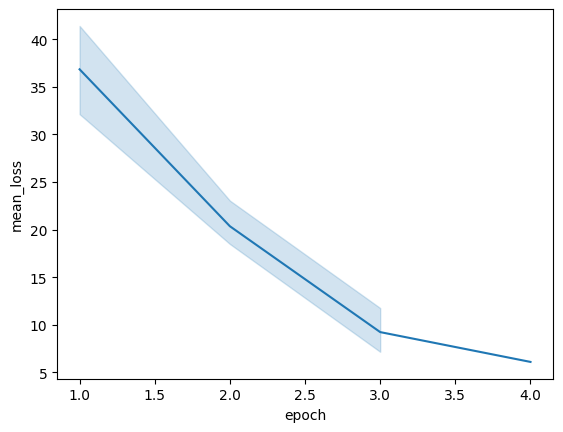

In [10]:
import pandas as pd
import seaborn as sns

model = operation.result()

snapshots = pd.DataFrame(model.tuning_task.snapshots)

sns.lineplot(data=snapshots, x = 'epoch', y='mean_loss')


In [11]:
model = genai.GenerativeModel(model_name=f'tunedModels/{tuned_model_id}')

In [18]:
result = model.generate_content('Sports')
result.text

'Sportsmanship.Passion.Victory.Competition.Play. #Sports #Fitness #Motivation #ActiveLife #Champions'

In [13]:
result = model.generate_content('Yoga')
result.text

'Find your peace. #YogaLife #Mindfulness #Wellness #Peace #Balance'

In [14]:
result = model.generate_content('Books')
result.text

' Escape into a book. #BookWorm #Reading #Literature #Books #Escape'

In [15]:
result = model.generate_content('Sportswear shop')
result.text

'Gear up for greatness. #Sportswear #ActiveLife #Fitness #Performance #Style'

In [17]:
result = model.generate_content('Ice Cream')
result.text

' Chill out with a scoop. #IceCream #Desserts #SweetTreat #CoolDown #SummerVibes'

# You Can Try Any Of them Listed In Above Data

In [19]:
genai.delete_tuned_model(f'tunedModels/{tuned_model_id}')

In [20]:
try:
  m = genai.get_tuned_model(f'tunedModels/{tuned_model_id}')
  print(m)
except Exception as e:
  print(f"{type(e)}: {e}")

<class 'google.api_core.exceptions.NotFound'>: 404 GET https://generativelanguage.googleapis.com/v1beta/tunedModels/caption-generator-6875?%24alt=json%3Benum-encoding%3Dint: Tuned model tunedModels/caption-generator-6875 does not exist.


## **Conclusion**
This project showcases how to create a fine-tuned caption generator using Google Generative AI API. With domain-specific training data, you can produce engaging and targeted captions for a wide range of inputs.

Feel free to expand the training dataset and adjust parameters like `epoch_count`, `batch_size`, and `learning_rate` to improve the model further.


In [22]:
!pip install langchain google-generativeai seaborn pandas -qU


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 59.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.2/412.2 kB 24.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 2.2.3 which is incompatible.


In [57]:
import google.generativeai as genai

# Configure API Key
genai.configure(api_key="TUNED_MODEL_API_1")


In [26]:
!pip install langchain-community -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.8/50.8 kB 4.2 MB/s eta 0:00:00


In [58]:
from langchain.llms.base import LLM
from pydantic import BaseModel, Field

# Custom LangChain LLM Wrapper
class GoogleGenAICustomLLM(LLM, BaseModel):
    model_name: str = Field(..., description="Name of the fine-tuned model")

    @property
    def _llm_type(self) -> str:
        return "google_generative_ai"

    def _call(self, prompt: str, stop: list = None) -> str:
        try:
            model = genai.GenerativeModel(model_name=self.model_name)
            response = model.generate_content(prompt)
            return response.text
        except Exception as e:
            return f"Error generating content: {e}"


In [59]:
# Replace this with your actual fine-tuned model ID
tuned_model_id = "tunedModels/name-generator-c19d8v6ih2oz"

# Load the fine-tuned model
model = genai.GenerativeModel(model_name=tuned_model_id)


In [60]:
from langchain.prompts import PromptTemplate

# Define the prompt template
prompt = PromptTemplate(
    input_variables=["business"],
    template="Generate a creative caption for {business}:"
)


In [61]:
from langchain.chains import LLMChain

llm = GoogleGenAICustomLLM(model_name=tuned_model_id)

# Create an LLM chain
chain = LLMChain(llm=llm, prompt=prompt)


In [62]:
# Example inputs
businesses = ["Sportswear shop", "Yoga studio", "Ice cream parlor"]

# Generate and print captions
for business in businesses:
    caption = chain.run(business=business)
    print(f"Business: {business}\nCaption: {caption}\n")


Business: Sportswear shop
Caption: Error generating content: 400 POST https://generativelanguage.googleapis.com/v1beta/tunedModels/name-generator-c19d8v6ih2oz:generateContent?%24alt=json%3Benum-encoding%3Dint: API key not valid. Please pass a valid API key.



Business: Yoga studio
Caption: Error generating content: 400 POST https://generativelanguage.googleapis.com/v1beta/tunedModels/name-generator-c19d8v6ih2oz:generateContent?%24alt=json%3Benum-encoding%3Dint: API key not valid. Please pass a valid API key.

Business: Ice cream parlor
Caption: Error generating content: 400 POST https://generativelanguage.googleapis.com/v1beta/tunedModels/name-generator-c19d8v6ih2oz:generateContent?%24alt=json%3Benum-encoding%3Dint: API key not valid. Please pass a valid API key.

